In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
api = wandb.Api()

In [ ]:
project = 'tiny_stories_saes'
entity = 'hustcollab'

runs = api.runs(f"{entity}/{project}")
data = []

for run in runs:
    expansion_factor = run.config.get("expansion_factor", None)
    l1_coef = run.config.get("l1_coefficient", None)
    final_l0_norm = run.summary.get("metrics/l0", None)
    final_l2_loss = run.summary.get("losses/mse_loss", None)
    final_ce_loss_score = run.summary.get("model_performance_preservation", None)['ce_loss_score']
    data.append({
        'expansion_factor': expansion_factor,
        'l1_coef': l1_coef,
        "l0_norm": final_l0_norm,
        "mse": final_l2_loss,
        "ce_loss_score": final_ce_loss_score
    })

df = pd.DataFrame(data)
print(df)

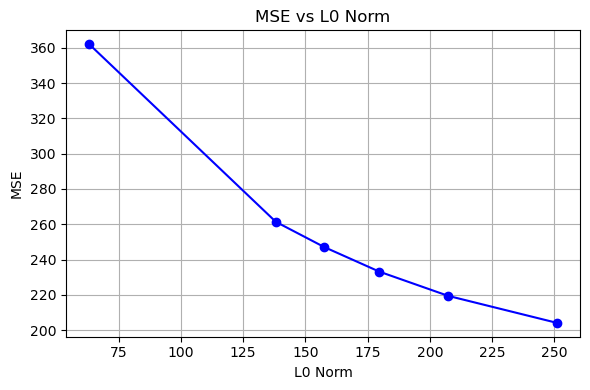

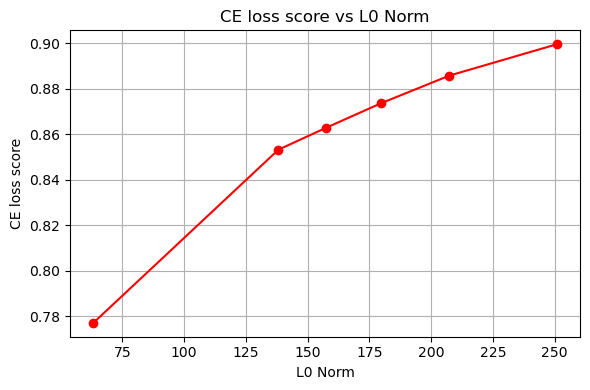

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 4))
# Plot 1: MSE vs L0 norm
ax1.plot(df['l0_norm'], df['mse'], marker='o', linestyle='-', color='b')
ax1.set_title('MSE vs L0 Norm')
ax1.set_xlabel('L0 Norm')
ax1.set_ylabel('MSE')
ax1.grid(True)
plt.tight_layout()
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 4))
# Plot 2: CE loss score vs L0 norm
ax2.plot(df['l0_norm'], df['ce_loss_score'], marker='o', linestyle='-', color='r')
ax2.set_title('CE loss score vs L0 Norm')
ax2.set_xlabel('L0 Norm')
ax2.set_ylabel('CE loss score')
ax2.grid(True)
plt.tight_layout()
plt.show()

In [8]:
project = 'gpt2small-mlp-out-saes'
entity = 'hustcollab'

runs = api.runs(f"{entity}/{project}")
data = []

for run in runs:
    layer = run.config.get("hook_layer", None)
    if layer != 7: 
        continue
    architecture = run.config.get("architecture", None)
    if architecture == 'standard': 
        l1_coef = run.config.get("l1_coefficient", None)
    else:
        k = run.config.get("activation_fn_kwargs", None)['k']
    # if k != 32:
    #     continue
    expansion_factor = run.config.get("expansion_factor", None)
    # layer = run.config.get("hook_layer", None)
    final_l2_loss = run.summary.get("losses/mse_loss", None)
    final_l0_norm = run.summary.get("metrics/l0", None)
    final_ce_loss_score = run.summary.get("model_performance_preservation", None)['ce_loss_score']
    num_dead = run.summary.get("sparsity/dead_features", None)

    data.append({
        'architecture': architecture,
        'l1_coef': l1_coef,
        'k': k,
        'layer': layer,
        'expansion_factor': expansion_factor,
        "mse": final_l2_loss,
        "l0_norm": final_l0_norm,
        "ce_loss_score": final_ce_loss_score,
        "num_dead": num_dead
    })

In [9]:
df = pd.DataFrame(data)
print(df)

  architecture  l1_coef    k  layer  expansion_factor         mse     l0_norm  \
0         topk       20  100      7                16  190.548157  100.000000   
1         topk       20   32      7                16  282.100220   32.000000   
2         topk       20   16      7                16  340.126007   16.000000   
3     standard       10   16      7                16  541.407349  179.378906   
4         topk       10   64      7                16  227.903229   64.000000   
5     standard       50   64      7                16  772.656372    0.490723   
6     standard       30   64      7                16  735.669067   18.325195   
7     standard       20   64      7                16  686.858215   51.331543   

   ce_loss_score  num_dead  
0       0.849010         0  
1       0.722559         1  
2       0.645043         9  
3       0.293707         0  
4       0.793403         0  
5       0.005808         0  
6       0.023995         0  
7       0.092718         0  


In [15]:
df.drop(df[df['l0_norm'] < 1].index, inplace=True)

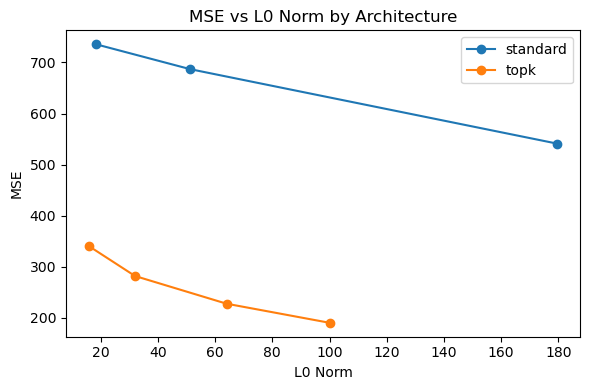

In [16]:
# Filter the dataframe for 'topk' and 'standard' architectures and sort by l0_norm
filtered = df[df['architecture'].isin(['topk', 'standard'])].sort_values('l0_norm')

fig, ax = plt.subplots(figsize=(6, 4))
# Plot a line for each architecture
for arch, group in filtered.groupby('architecture'):
    ax.plot(group['l0_norm'], group['mse'], marker='o', linestyle='-', label=arch)

ax.set_title('MSE vs L0 Norm by Architecture')
ax.set_xlabel('L0 Norm')
ax.set_ylabel('MSE')
ax.legend()
plt.tight_layout()
plt.show()


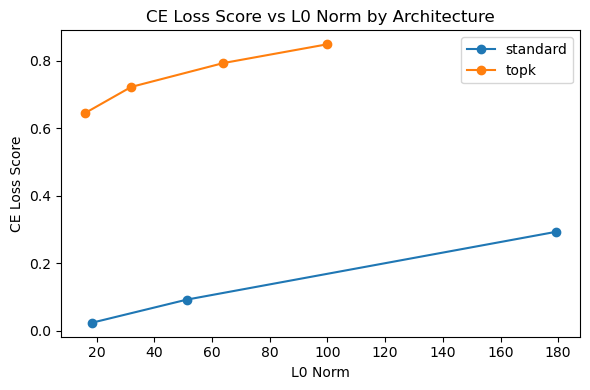

In [17]:
# Filter the dataframe for 'topk' and 'standard' architectures and sort by l0_norm
filtered = df[df['architecture'].isin(['topk', 'standard'])].sort_values('l0_norm')

fig, ax = plt.subplots(figsize=(6, 4))
# Plot a line for each architecture
for arch, group in filtered.groupby('architecture'):
    ax.plot(group['l0_norm'], group['ce_loss_score'], marker='o', linestyle='-', label=arch)

ax.set_title('CE Loss Score vs L0 Norm by Architecture')
ax.set_xlabel('L0 Norm')
ax.set_ylabel('CE Loss Score')
ax.legend()
plt.tight_layout()
plt.show()

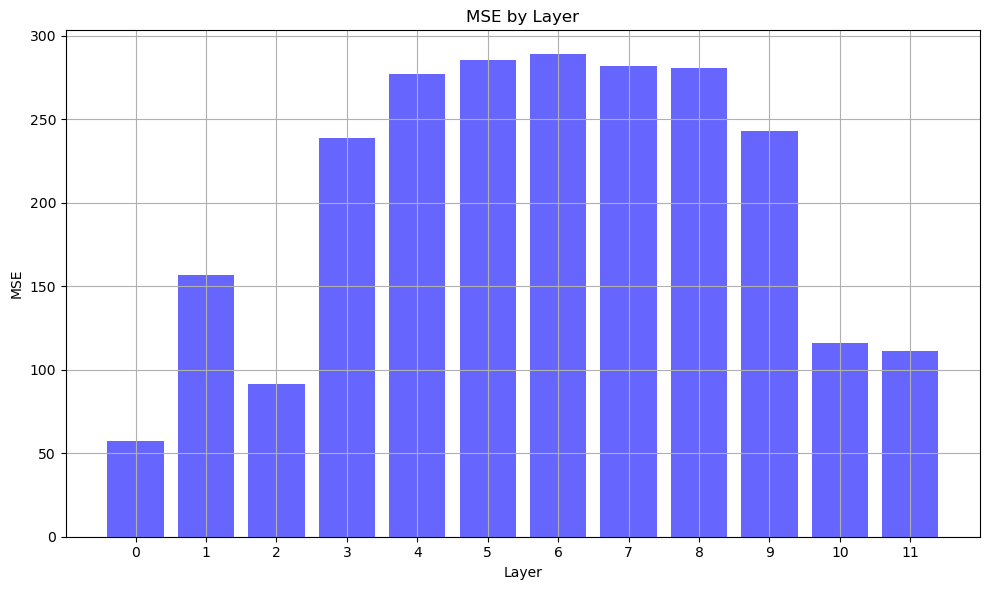

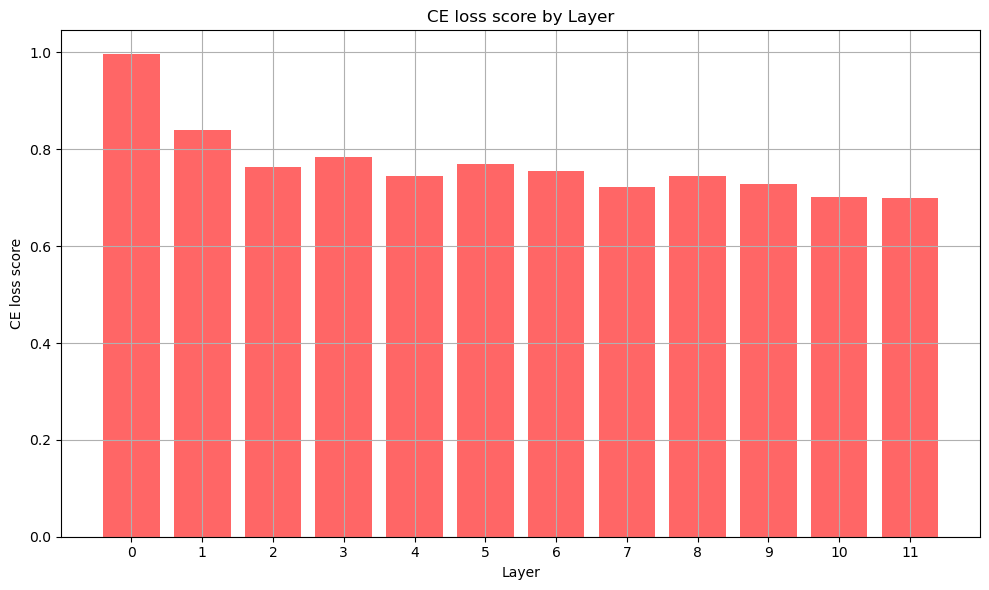

In [15]:
# Plot 3: Column graph for MSE
fig, ax3 = plt.subplots(figsize=(10, 6))
df['layer'] = df['layer'].astype(str)
ax3.bar(df['layer'], df['mse'], color='b', alpha=0.6, label='MSE')
ax3.set_title('MSE by Layer')
ax3.set_xlabel('Layer')
ax3.set_ylabel('MSE')
ax3.grid(True)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Plot 4: Column graph for CE loss score
fig, ax4 = plt.subplots(figsize=(10, 6))
df['layer'] = df['layer'].astype(str)
ax4.bar(df['layer'], df['ce_loss_score'], color='r', alpha=0.6, label='CE loss score')
ax4.set_title('CE loss score by Layer')
ax4.set_xlabel('Layer')
ax4.set_ylabel('CE loss score')
ax4.grid(True)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
project = 'sae_lens_tutorial'
entity = 'hustcollab'

runs = list(api.runs(f"{entity}/{project}"))[-12:]
data = []

for run in runs:
    architecture = run.config.get("architecture", None)
    if architecture == 'standard': 
        continue
    k = run.config.get("activation_fn_kwargs", None)['k']
    expansion_factor = run.config.get("expansion_factor", None)
    layer = run.config.get("hook_layer", None)
    final_l2_loss = run.summary.get("losses/mse_loss", None)
    final_ce_loss_score = run.summary.get("model_performance_preservation", None)['ce_loss_score']
    num_dead = run.summary.get("sparsity/dead_features", None)

    data.append({
        'layer': layer,
        'expansion_factor': expansion_factor,
        "mse": final_l2_loss,
        "ce_loss_score": final_ce_loss_score,
        "num_dead": num_dead
    })

In [6]:
df = pd.DataFrame(data)
print(df)

    layer  expansion_factor         mse  ce_loss_score  num_dead
0       0                32   50.486359       0.996549      3286
1       1                32  133.680557       0.812639         3
2       2                32   65.437920       0.791119        42
3       3                32  194.713699       0.853042         3
4       4                32  258.841492       0.783736         5
5       5                32  269.738342       0.811752        11
6       6                32  279.606934       0.798306        18
7       7                32  270.851318       0.774405        14
8       8                32  273.469604       0.743115        17
9       9                32  247.977249       0.727235        50
10     10                32  116.976372       0.687415       292
11     11                32  111.326965       0.716735       181


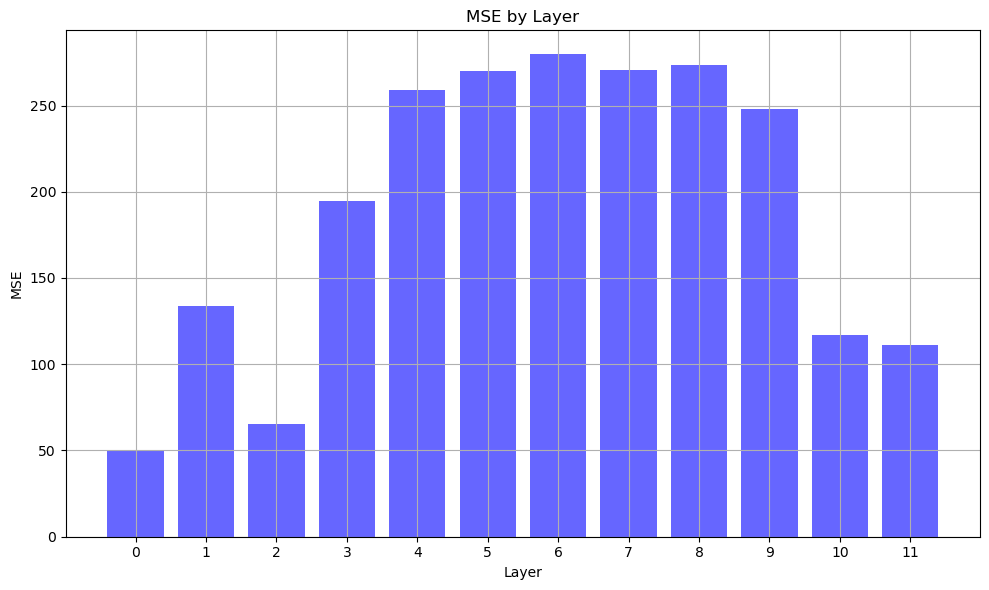

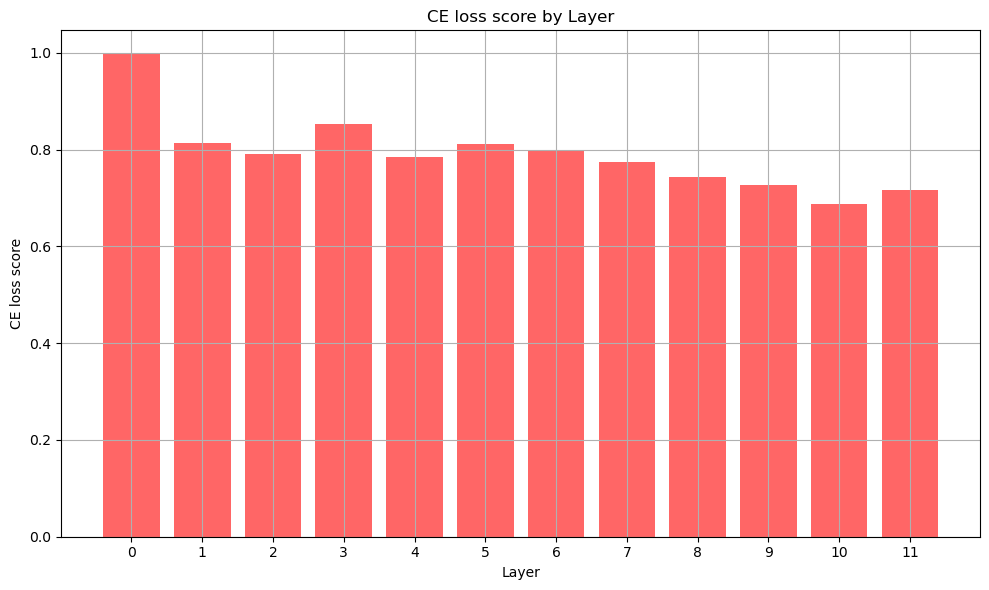

In [7]:
# Plot 3: Column graph for MSE
fig, ax3 = plt.subplots(figsize=(10, 6))
df['layer'] = df['layer'].astype(str)
ax3.bar(df['layer'], df['mse'], color='b', alpha=0.6, label='MSE')
ax3.set_title('MSE by Layer')
ax3.set_xlabel('Layer')
ax3.set_ylabel('MSE')
ax3.grid(True)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Plot 4: Column graph for CE loss score
fig, ax4 = plt.subplots(figsize=(10, 6))
df['layer'] = df['layer'].astype(str)
ax4.bar(df['layer'], df['ce_loss_score'], color='r', alpha=0.6, label='CE loss score')
ax4.set_title('CE loss score by Layer')
ax4.set_xlabel('Layer')
ax4.set_ylabel('CE loss score')
ax4.grid(True)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()